<a href="https://colab.research.google.com/github/lmeneses7/Final_Examen/blob/main/Examen_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instrucciones

**El examen puede ser realizado en grupo de tres personas, sin embargo, cada integrante crear y ejecutar las tareas de actualización en su GitHub.**

A continuación, se encuentran las instrucciones para el desarrollo del examen de nuestro curso de Ciencias de Datos para la Economía, el cual es parte de su portfolio.

**Objetivo**: Que el/la estudiante utilice las herramientas de Git y posteriormente publicar su primer proyecto de ciencias de datos en GitHub.

A continuación encontrará el dataset **ingresos.txt** en la carpeta de **Datos**, el cual contiene información de variables que buscan predecir los ingresos anuales de los encuestados utilizando datos de encuestas de 1990.

El dataset tiene 1.816 filas y 14 columnas. A continuación se describen las columnas:

- estatura: Unidad de medida centímetros
- peso: Unidad de medida kilogramos
- genero
- ingresos: en dólares
- etnia: etnia en EE.UU.
- educacion: en años
- educacion_madre: en años
- educacion_padre: en años
- Camina: Camina al trabajo
  - 1: Nunca
  - 2: Una vez al mes o menos
  - 3: Alrededor de dos veces al mes
  - 4: Alrededor de una veces a la semana
  - 5: Dos veces a la semana
  - 6: Tres veces a la semana
  - 7: Mas de tres veces a la semana
  - 8: Todos los días
- ejercicio: días de la semana que practica ejercicios
- fumador: Fuma 7 cigarros o más a la semana
  - 1: Si
  - 2: No
- tenso: días de la semana en dicho estado
- malhumorado: : días de la semana en dicho estado
- edad: en años



**Tareas solicitadas:**

Con el set de datos  ingresos.txt, debe realizar las siguientes actividades tanto en Python, Git y GitHub.:

- Crear carpeta donde va a trabajar su proyecto


- Inicializar su proyecto en git

  **`git init`**

- Crear un cuaderno de jupyter notebook, ya sea en colab o en su computador, para realizar su actividad.


- Crear un archivo con nombre README.md
touch README.md

- Describa su proyecto en el archivo README.md utilizando lenguaje markdown o latex. Puede usar como ayuda gráfica la página web indicada en las slices vistas en clase.

- Realizar un análisis descriptivos y visualización de datos: Debe realizar tareas tales como, descripción de los datos, transformaciones en caso de ser necesario, imputación, entro otras.
Debe guardar su proyecto y agregar el archivo a Git y comentarlo.

  **`crt + s`**

  **`git add`**

  **`git commit`**

- Crear un repositorio remoto en GitHub con el nombre Ciencias de Datos:

- Conectarse desde su computador al repositorio remoto. No olvide enlazar su computador.
git remote add origin https://github.com/nombre_usuario/nombre_repositorio.git

  Otra alternativa es realizar el proyecto usanod colab.

- Crear rama principal en su computador

  **`git branch -M main`**

- Agregar cuaderno de jupyter a repositorio remoto

  **`git push -u origin main`**

- Crear nueva rama para la segunda parte del Proyecto.

  **`git branch`**

- Moverse a nueva rama para la segunda parte del Proyecto.

  **`git checkout`**

- Continuar con su tarea en jupyter notebook. Ahora deberá aplicar reducción de dimensionalidad usando el algoritmo PCA. No es necesario que realice los test estadístico, solamente explicarlos e indicar que se cumplen los supuestos.
Debe guardar su proyecto y agregar el archivo a Git y comentarlo.

  **`crt + s`**

  **`git add`**

  **`git commit`**

- Moverse a la rama principal y realizar merge a la rama creada.

  **`git merge`**

- Actualizar la rama principal de su repositorio remoto y agregar la rama creada

  **`git push origin main`**

  **`git push origin nombre_rama_2`**


- Finalmente, cada integrante debe agregar la url de su proyecto en el aulavirtual

**Fecha Entrega: Domingo 15 de Diciembre de 2024, 23:00 hrs.**


**Nota 1:** Los códigos y pasos indicados deben ser utilizados como referencia, ya que es posible que algún paso o comandos no se hayan indicado.

**Nota 2**: En caso de que no pueda generar el proyecto con las ramas solicitadas, puede cargar el proyecto con un solo push.

## **Colab y Github**

In [2]:
from google.colab import auth
auth.authenticate_user()

In [3]:
!git clone https://github.com/lmeneses7/Final_Examen
%cd Final_Examen

Cloning into 'Final_Examen'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 0), reused 12 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 4.11 KiB | 4.11 MiB/s, done.
/content/Final_Examen


In [21]:
#@title Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
#@title Carga de Datos
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
data = pd.read_csv('/content/drive/MyDrive/Ciencia de Datos para Economía/ingresos-1.txt', sep='\t')
data = data.dropna() #quitamos las observaciones con valores nulos.

In [ ]:
#@title Resumen Estadístico
print(data.describe())


## **Limpieza  y Transofrmación de Datos**

In [12]:
#Convertiremos la columna "genero" en valores dummy
data['genero'] = data['genero'].replace({'masculino': 1, 'femenino': 0})
data['etnia'] = data['etnia'].replace({'Blanco': 1, 'Other': 0, 'Afroamericano':3, 'Latino':4})
print(data['etnia'].unique())

[1 0 3 4]


## **Análisis Exploratorio**


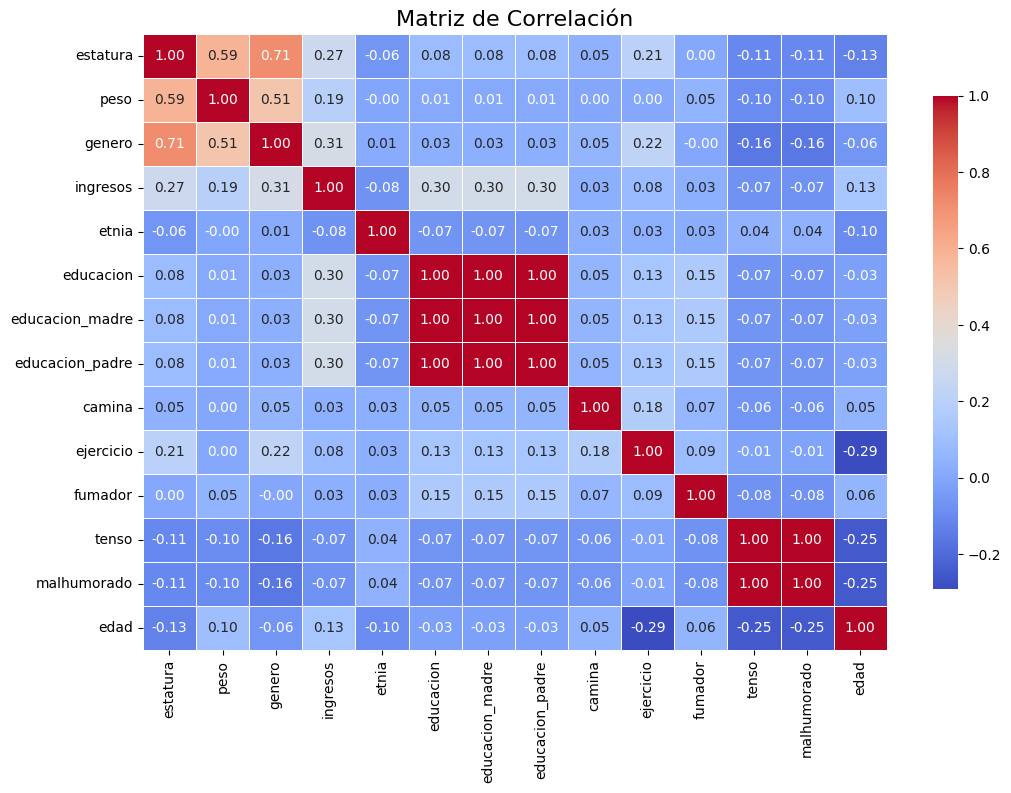

In [13]:
#@title Correlaciones
# Crear la matriz de correlación
correlation_matrix = data.corr()

#configuramos el tamaño del gráfico
plt.figure(figsize=(12, 8))

#Realizamos el heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": 0.8},
    linewidths=0.5
)
plt.title("Matriz de Correlación", fontsize=16)
plt.show()

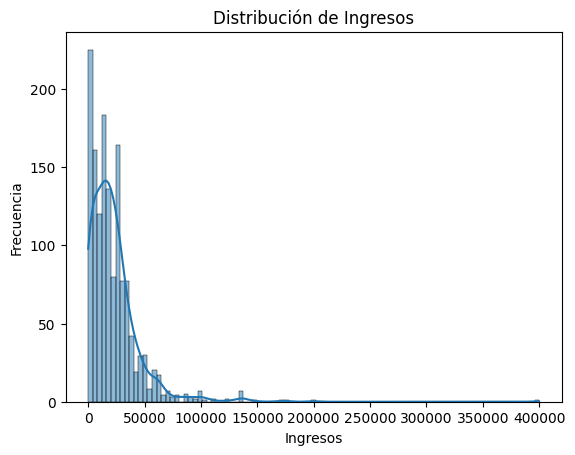

In [14]:
#@title Distribucion de Ingresos
sns.histplot(data['ingresos'], kde=True)
plt.title('Distribución de Ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.show()

<Axes: xlabel='genero', ylabel='ingresos'>

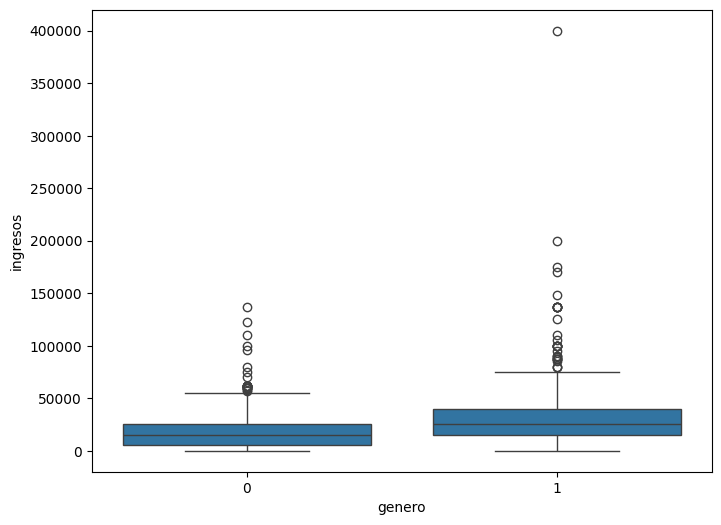

In [15]:
#@title Boxplot de los Ingresos por Género
plt.figure(figsize=(8, 6))
sns.boxplot(x='genero', y='ingresos', data=data)


## **PCA - Reducción de Dimensionalidad**


In [18]:
#@title Analísis PCA
#Seleccionamos las columnas númericas.
features = ['estatura', 'peso','educacion','ejercicio','edad']

#Escalamiento de los datos
scaler = StandardScaler()
x = scaler.fit_transform(data[features])

In [19]:
#@title Aplicamos PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Verificar los nuevos datos
print(pca_df.head())

        PC1       PC2
0  2.360637  0.990727
1 -0.431478 -0.405595
2 -0.993335 -0.613571
3 -1.503012  0.330248
4  0.237492  0.829792


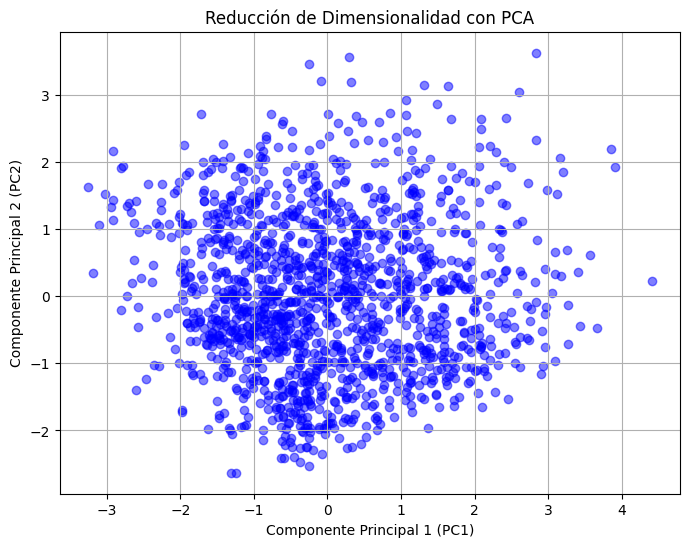

In [20]:
#@title Visualización
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', alpha=0.5)
plt.title('Reducción de Dimensionalidad con PCA')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.grid()
plt.show()

#En el README en la rama pca del github, se encuentra los supuestos que cumple.

## **Modelo de Predicción**

In [24]:
X = data[['educacion', 'edad', 'peso', 'estatura']]  # Variables predictoras
y = data['ingresos']  # Variable objetivo

#division train y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Entrenar el modelo.
model = LinearRegression()
model.fit(X_train, y_train)

#Predicciones
y_pred = model.predict(X_test)

#evaluación del modelo
print("Error cuadrático medio (MSE):", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Error cuadrático medio (MSE): 757038832.2888389
R^2 Score: 0.12853895139447602


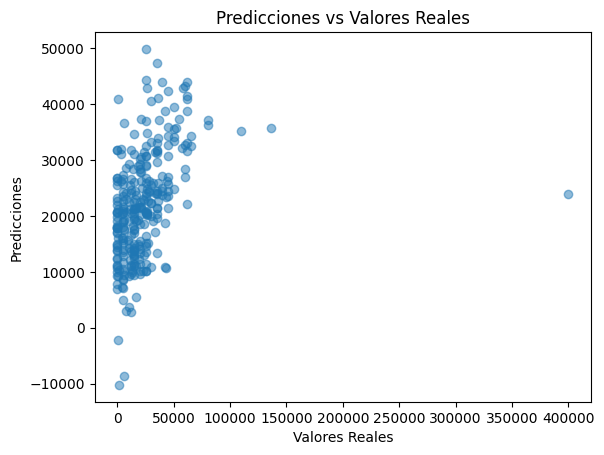

In [26]:
#@title Visualización del Modelo
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Predicciones vs Valores Reales")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.show()